
===== Decision Tree (gini) =====
Accuracy: 0.9777777777777777
Feature Importances: [0.         0.         0.55087719 0.44912281]


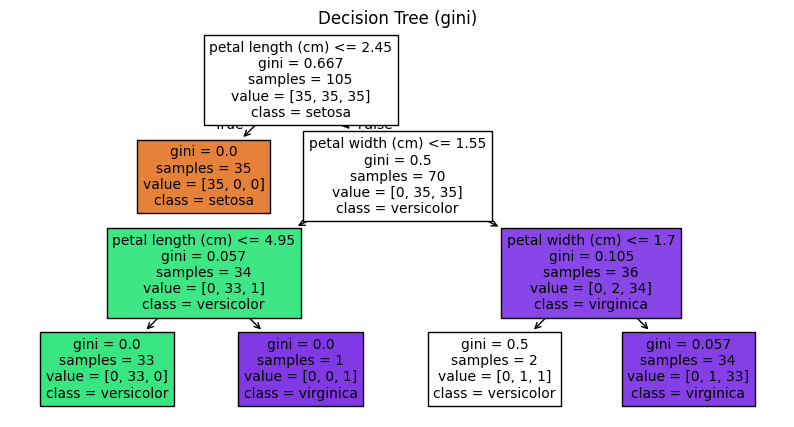


===== Decision Tree (entropy) =====
Accuracy: 0.9333333333333333
Feature Importances: [0.02909594 0.         0.64358941 0.32731465]


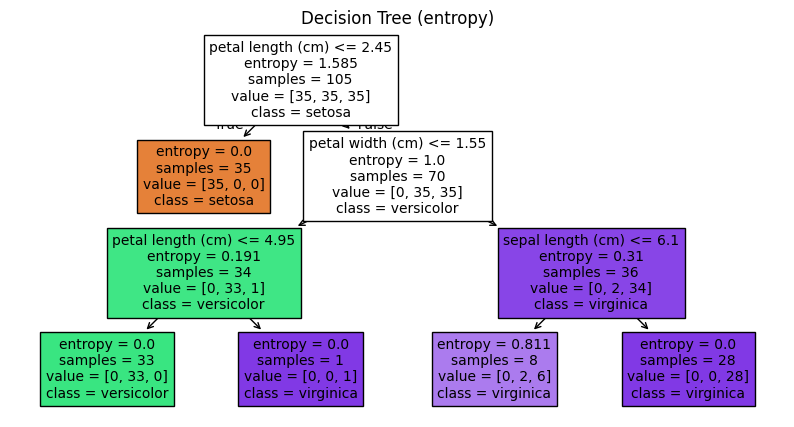

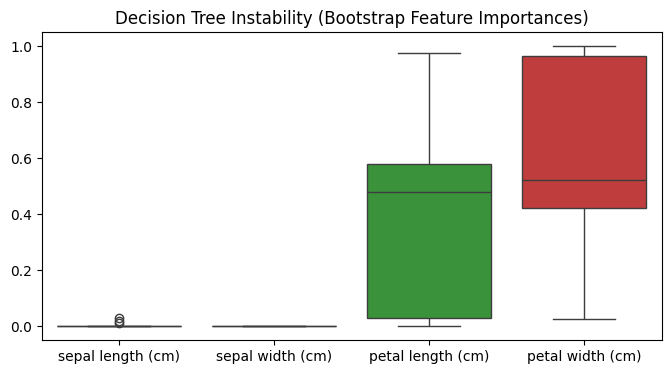

In [1]:
# Decision Tree Classifier: Gini vs Entropy + Bootstrap Instability
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Compare Gini vs Entropy
for crit in ["gini", "entropy"]:
    print(f"\n===== Decision Tree ({crit}) =====")
    dt = DecisionTreeClassifier(criterion=crit, max_depth=3,
                                min_samples_split=4, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Feature Importances:", dt.feature_importances_)

    plt.figure(figsize=(10, 5))
    plot_tree(dt, feature_names=feature_names,
              class_names=data.target_names, filled=True)
    plt.title(f"Decision Tree ({crit})")
    plt.show()

# Instability via Bootstrap
n_bootstraps = 30
importances = []
for _ in range(n_bootstraps):
    idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_b, y_b = X_train[idx], y_train[idx]
    dt_bs = DecisionTreeClassifier(max_depth=3, random_state=None)
    dt_bs.fit(X_b, y_b)
    importances.append(dt_bs.feature_importances_)

importances = np.array(importances)

plt.figure(figsize=(8, 4))
sns.boxplot(data=importances)
plt.xticks(range(len(feature_names)), feature_names)
plt.title("Decision Tree Instability (Bootstrap Feature Importances)")
plt.show()


In [2]:
# ----------------------------------------------------------
# ENSEMBLE METHODS:
# Bagging, RandomForest, AdaBoost, Stacking
# ----------------------------------------------------------
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier,
    AdaBoostClassifier, StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X, y = data.data, data.target

# Same fixed split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# ----------------------------------------------------------
# Base Decision Tree
# ----------------------------------------------------------
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("\nSingle Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# ----------------------------------------------------------
# Bagging
# ----------------------------------------------------------
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=0
)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, bag_pred))

# ----------------------------------------------------------
# Random Forest (with OOB score)
# ----------------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    oob_score=True,
    bootstrap=True,
    random_state=0
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest OOB Score:", rf.oob_score_)

# ----------------------------------------------------------
# AdaBoost
# ----------------------------------------------------------
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.8,
    random_state=0
    # algorithm="SAMME"   # optional: avoids future warning
)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

# ----------------------------------------------------------
# Stacking (Tree + SVM → Logistic Regression)
# ----------------------------------------------------------
estimators = [
    ("dt", DecisionTreeClassifier(max_depth=3)),
    ("svm", SVC(probability=True))
]
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, stack_pred))

# ----------------------------------------------------------
# Summary Table
# ----------------------------------------------------------
print("\n=== ACCURACY SUMMARY ===")
print(f"Decision Tree : {accuracy_score(y_test, dt_pred):.3f}")
print(f"Bagging : {accuracy_score(y_test, bag_pred):.3f}")
print(f"RandomForest : {accuracy_score(y_test, rf_pred):.3f}")
print(f"AdaBoost : {accuracy_score(y_test, ada_pred):.3f}")
print(f"Stacking : {accuracy_score(y_test, stack_pred):.3f}")


Single Decision Tree Accuracy: 0.9777777777777777
Bagging Accuracy: 0.9777777777777777
Random Forest Accuracy: 0.9777777777777777
Random Forest OOB Score: 0.9333333333333333
AdaBoost Accuracy: 0.9555555555555556
Stacking Accuracy: 1.0

=== ACCURACY SUMMARY ===
Decision Tree : 0.978
Bagging : 0.978
RandomForest : 0.978
AdaBoost : 0.956
Stacking : 1.000
